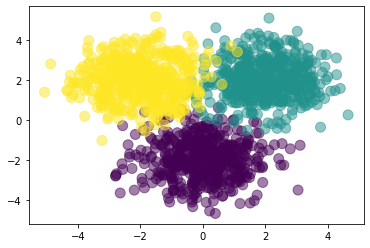

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#generate random data
n = 500
D = 2 # dimensionality of input
K = 3 # number of classes

X1 = np.random.randn(n, 2) + np.array([0, -2])
X2 = np.random.randn(n, 2) + np.array([2, 2])
X3 = np.random.randn(n, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*n + [1]*n + [2]*n)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.5)
plt.show()

N = len(Y)
Y_ind = np.zeros((N, K))
for i in range(N):
    Y_ind[i, Y[i]] = 1

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epoch:  0 / 50  Cost:  1.238626092672348  Accuracy:  0.4033333333333333
Epoch:  1 / 50  Cost:  1.2120405435562134  Accuracy:  0.4166666666666667
Epoch:  2 / 50  Cost:  1.1860791742801666  Accuracy:  0.43333333333333335
Epoch:  3 / 50  Cost:  1.1607164442539215  Accuracy:  0.45
Epoch:  4 / 50  Cost:  1.1359822154045105  Accuracy:  0.47333333333333333
Epoch:  5 / 50  Cost:  1.1118746995925903  Accuracy:  0.5066666666666667
Epoch:  6 / 50  Cost:  1.0883700251579285  Accuracy:  0.5333333333333333
Epoch:  7 / 50  Cost:  1.0654330551624298  Accuracy:  0.5866666666666667
Epoch:  8 / 50  Cost:  1.0430582463741302  Accuracy:  0.63
Epoch:  9 / 50  Cost:  1.0212065279483795  Accuracy:  0.67
Epoch:  10 / 50  Cost:  0.9998271316289902  Accuracy:  0.6866666666666666
Epoch:  11 / 50  Cost:  0.978856161236763  Accuracy:  0.6933333333333334
Epoch:  12 / 50  Cost:  0.9582608193159103  Accuracy:  0.7133333333333334
Epoch:  13 / 50  Cost:  0.9380196183919907  Accuracy:  0.7233333333333334
Epoch:  14 / 50 

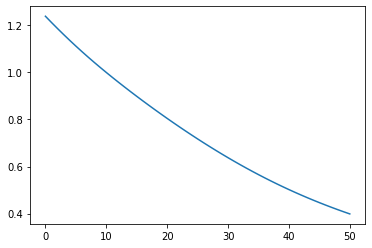

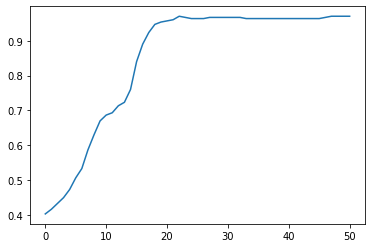

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
from torch.autograd import Variable
from torch import optim

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

brain = torch.nn.Sequential()
brain.add_module("dense1", torch.nn.Linear(D, 10))
brain.add_module("relu1", torch.nn.ReLU())
brain.add_module("dense3", torch.nn.Linear(10, K))

loss = torch.nn.CrossEntropyLoss(size_average=True)
optimizer = optim.Adam(brain.parameters())

def train(brain, loss, optimizer, inputs, labels):
  inputs = Variable(inputs, requires_grad=False)
  labels = Variable(labels, requires_grad=False)

  optimizer.zero_grad()

  #feedforward
  logits = brain.forward(inputs)
  output = loss.forward(logits, labels)

  #backprop
  output.backward()
  optimizer.step()

  return output.item()

def predict(brain, inputs):
  inputs = Variable(inputs, requires_grad=False)
  logits = brain.forward(inputs)
  return logits.data.numpy().argmax(axis=1)



X_train = torch.from_numpy(X_train).float()
Y_train = torch.from_numpy(Y_train).long()
X_test = torch.from_numpy(X_test).float()

epochs = 50
batch_size = 250
n_batches = X_train.size()[0] // batch_size

costs = []
test_accuracies = []
for i in range(epochs+1):
  cost = 0.
  for j in range(n_batches):
    X_batch = X_train[j*batch_size:(j+1)*batch_size]
    Y_batch = Y_train[j*batch_size:(j+1)*batch_size]
    cost += train(brain, loss, optimizer, X_batch, Y_batch)

  Y_pred = predict(brain, X_test)
  acc = np.mean(Y_test == Y_pred)
  print('Epoch: ', i, '/', epochs, ' Cost: ', cost/n_batches, ' Accuracy: ', acc)

  costs.append(cost / n_batches)
  test_accuracies.append(acc)

plt.plot(costs)
plt.show()

plt.plot(test_accuracies)
plt.show()